#  Singlet doublet fermion dark matter model

Sample of notebook for specific model

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *


## Check one point

In [2]:
a=hep(MODEL='SimplifiedDMSDFDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [5]:
v=a.vev
#lambda_1=0.13
mdf=1100
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDF' %mdf
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI,a.Series.sigmav

Omega h^2, SI proton, neutron = 0.115 1.703e-11 1.737e-11 8.59e-27


## Scan $m_{DM}$

In [8]:
df=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
dm_masses=np.linspace(100,1200,100)
for MDM in dm_masses:
    if np.where(dm_masses==MDM)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDM)[0][0]
    a.LHA.blocks['MINPAR'][2]='%0.8E       #MDF' %MDM  # -> Fill a.Series.MDF
    a.runmicromegas(Direct_Detection=True)
    df=df.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


### Relic density

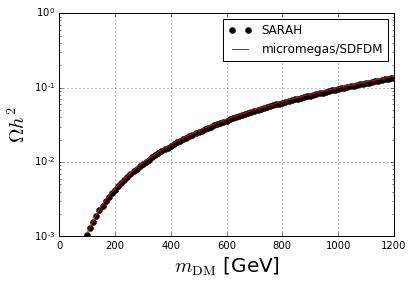

In [9]:
plt.semilogy(df.MDF,df.Omega_h2,'ko',label='SARAH')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.legend(loc='best')
plt.savefig('omega.pdf')

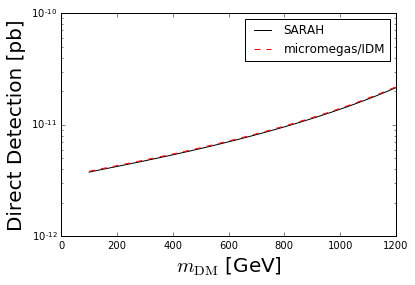

In [10]:
plt.semilogy(df.MDF,df.proton_SI,'k-',label='SARAH')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.legend(loc='best')
plt.savefig('dd.pdf')

In [43]:


if 1==1:
    filein='fff'
    APPEND=False
    try:
        fo=os.stat(filein)
        fin=open(filein,'a')
    except OSError as err:
        fin=open(filein,'w')
        
    fin.write('1\n')
    fin.close()
    #if APPEND:    

In [1]:
import os
def _append_ssp(spcfile='SPheno.spc.radinert',sspfile='SPheno.ssp.radinert',):
    try: 
        f=open(spcfile, 'r')
    except : # whatever reader errors you care about
        sys.exit('LesHouches file not found')
    fspc=f.readlines()
    if os.path.exists(sspfile):
        fssp=open(sspfile, 'a')
    else:
        fssp=open(sspfile, 'w')
    fssp.writelines(fspc)
    fssp.write('ENDOFPARAMETERFILE\n')
    fssp.close()
    f.close()

In [3]:
_append_ssp()

In [69]:
rm SPheno.ssp.radinert

In [59]:
os.path.exists(spcfile)

False

In [49]:
try: 
    os.path.exists('aaf')
except:
    print(1)

In [54]:
os.

TypeError: read() takes exactly 2 arguments (1 given)

In [42]:
%%bash
touch fff

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)